<a href="https://colab.research.google.com/github/Laxmi-Narayana-Chilakala/DataScience-Projects/blob/master/dogsvscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chilakala","key":"186eae8a65924696966fcec3aca8e8bd"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#! kaggle competitions download -c 'name-of-competition'
! kaggle datasets download -d 'chetankv/dogs-cats-images'

 99% 432M/435M [00:14<00:00, 46.3MB/s]
100% 435M/435M [00:14<00:00, 30.9MB/s]


In [8]:
import os
import zipfile


In [9]:
local_file='/content/dogs-cats-images.zip'
zip_ref=zipfile.ZipFile(local_file)

zip_ref.extractall('/content')
zip_ref.close()

In [10]:
base_dir='/content/dog vs cat'

train_dir='/content/dog vs cat/dataset/training_set'
test_dir='/content/dog vs cat/dataset/test_set'

train_cats_dir='/content/dog vs cat/dataset/training_set/cats'
train_dogs_dir='/content/dog vs cat/dataset/training_set/dogs'
test_cats_dir='/content/dog vs cat/dataset/test_set/cats'
test_dogs_dir='/content/dog vs cat/dataset/test_set/dogs'

In [11]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( test_cats_dir ) ))
print('total validation dog images :', len(os.listdir( test_dogs_dir ) ))

total training cat images : 4000
total training dog images : 4000
total validation cat images : 1000
total validation dog images : 1000


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(128,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(128,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Flatten(),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dense(1,activation='sigmoid')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [17]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [18]:
train_gen=ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_gen=ImageDataGenerator(rescale=1./255)

In [19]:
train_generator=train_gen.flow_from_directory(train_dir,
                                              class_mode='binary',
                                              target_size=(150,150),
                                              batch_size=20)

test_generator=test_gen.flow_from_directory(test_dir,
                                            class_mode='binary',
                                            target_size=(150,150),
                                            batch_size=20)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [20]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [21]:
history=model.fit_generator(train_generator,
                              validation_data=test_generator,
                              epochs=32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/32
400/400 [==============================] - 109s 196ms/step - loss: 0.6912 - accuracy: 0.5355 - val_loss: 0.6760 - val_accuracy: 0.5850
Epoch 2/32
400/400 [==============================] - 79s 197ms/step - loss: 0.6768 - accuracy: 0.5736 - val_loss: 0.6675 - val_accuracy: 0.6360
Epoch 3/32
400/400 [==============================] - 79s 198ms/step - loss: 0.6558 - accuracy: 0.6120 - val_loss: 0.6248 - val_accuracy: 0.6645
Epoch 4/32
400/400 [==============================] - 79s 197ms/step - loss: 0.6210 - accuracy: 0.6575 - val_loss: 0.5774 - val_accuracy: 0.7025
Epoch 5/32
400/400 [==============================] - 79s 198ms/step - loss: 0.5945 - accuracy: 0.6837 - val_loss: 0.5558 - val_accuracy: 0.7225
Epoch 6/32
400/400 [==============================] - 79s 197ms/step - loss: 0.5895 - accuracy: 0.6805 - val_loss: 0.5800 - val_accuracy: 0.6630
Epoch 7/32
400/400 [==============================] - 79s 198ms/step - loss: 0.5699 - accuracy: 0.7048 - val_loss: 0.5202 - val_a

<Figure size 432x288 with 0 Axes>

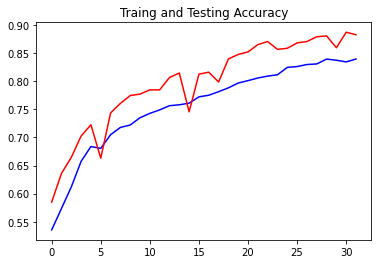

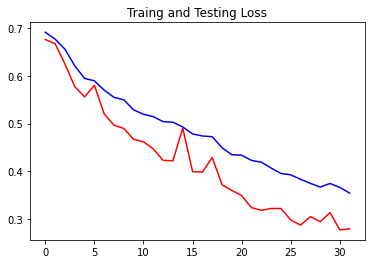

<Figure size 432x288 with 0 Axes>

In [24]:

acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training_accuracy')
plt.plot(epochs,val_acc,'r',label='Testing_accuracy')
plt.title('Traing and Testing Accuracy')
plt.figure()



plt.plot(epochs,loss,'b',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Testing_loss')
plt.title('Traing and Testing Loss')
plt.figure()